# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here
employees=pd.read_csv('Employee.csv')
employees

Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
employees.groupby(['Department']).mean()['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# Method 2
pd.pivot_table(employees, index = ['Department'], values="Salary")

Salary
Department        
HR           45.00
IT           48.75
Sales        55.00

#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
pd.pivot_table(employees, index = ['Department','Title'] ,values="Salary")

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [15]:
# your code here
pd.pivot_table(employees, index = ['Title'] ,columns = 'Years' ,values="Salary",aggfunc={'Salary':np.mean})

Years         1     2     3     4     7     8
Title                                        
VP          NaN   NaN   NaN   NaN   NaN  70.0
analyst    35.0  30.0   NaN  35.0   NaN   NaN
associate   NaN  55.0  55.0   NaN  60.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
pd.pivot_table(employees,index=['Department','Title'],values='Salary',aggfunc={'Salary':np.mean,'Department':len})

Department  Salary
Department Title                        
HR         VP                  1    70.0
           analyst             2    32.5
IT         VP                  1    70.0
           analyst             2    32.5
           associate           1    60.0
Sales      associate           2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [18]:
# your code here
pd.pivot_table(employees, index = ['Department', 'Title'], values= 'Salary', aggfunc= {np.mean, np.median, min, max, np.std})

max  mean  median   min       std
Department Title                                        
HR         VP         70.0  70.0    70.0  70.0       NaN
           analyst    35.0  32.5    32.5  30.0  3.535534
IT         VP         70.0  70.0    70.0  70.0       NaN
           analyst    35.0  32.5    32.5  30.0  3.535534
           associate  60.0  60.0    60.0  60.0       NaN
Sales      associate  55.0  55.0    55.0  55.0  0.000000

In [9]:
"""
Irrespective of them being same position the mean salary for various job titles are really different 
which suggests that few values are missing.
"""

'\nIrrespective of them being same position the mean salary for various job titles are really different \nwhich suggests that few values are missing.\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [17]:
# your code here
employees.pivot_table(index = ['Department', 'Title'], values= 'Salary',fill_value=0, aggfunc= {np.mean, np.median, min, max, np.std})

max  mean  median  min       std
Department Title                                      
HR         VP          70  70.0    70.0   70  0.000000
           analyst     35  32.5    32.5   30  3.535534
IT         VP          70  70.0    70.0   70  0.000000
           analyst     35  32.5    32.5   30  3.535534
           associate   60  60.0    60.0   60  0.000000
Sales      associate   55  55.0    55.0   55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [19]:
# your code here
pd.pivot_table(employees,index=['Department'],values='Salary',aggfunc={'Salary':np.sum,'Department':len})

Department  Salary
Department                    
HR                   3     135
IT                   4     195
Sales                2     110

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [20]:
# your code here
pd.pivot_table(employees, index = ['Department','Title'], values=['Years','Salary'],aggfunc={'Years':[np.sum],'Salary':[np.mean]})

Salary Years
                       mean   sum
Department Title                 
HR         VP          70.0     8
           analyst     32.5     6
IT         VP          70.0     8
           analyst     32.5     3
           associate   60.0     7
Sales      associate   55.0     5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [33]:
# your code here
fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head(3)

Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  2015-05-08            1934    905      0.65       0              1.355   
1  2015-05-09            3631  18925     14.11       4            611.000   
2  2015-05-10            3204  14228     10.57       1            602.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   

   Activity Calories  ...  Distance_miles      Days  Days_encoded  \
0               1680  ...        0.403891    Friday           4.0   
1               2248  ...        8.767545  Saturday           5.0   
2               1719  ...        6.567891    Sunday           6.0   

   Work_or_Weekend  Hours Sleep Sleep efficiency  Yesterday_sleep  \
0                1     6.400000        92.086331         0.000000   
1                0     7.566667        92.464358         6.400000   
2                0     6.450000        88.761468         7.566667   

   Yesterday_sleep_efficiency  Months  Months_encoded  
0                    0.000000     May               5  
1                   92.086331     May               5  
2                   92.464358     May               5  

[3 rows x 24 columns]

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [35]:
# your code here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [36]:
fitbit.describe()

Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max       4351.000000  26444.000000   20.450000  101.000000   

       Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  \
count         367.000000              367.000000             367.000000   
mean          563.934482              236.405995              26.163488   
std           294.793145               86.531376              20.319456   
min             1.002000                0.000000               0.000000   
25%           520.000000              179.000000               8.000000   
50%           663.000000              226.000000              24.000000   
75%           756.500000              290.000000              41.500000   
max           998.000000              472.000000             101.000000   

       Minutes Very Active  Activity Calories  MinutesOfSleep  ...  \
count           367.000000         367.000000      367.000000  ...   
mean             35.722071        2044.147139      290.479564  ...   
std              31.006682        2041.267168      154.752328  ...   
min               0.000000           0.000000        0.000000  ...   
25%              10.500000        1218.500000      224.000000  ...   
50%              29.000000        1553.000000      337.000000  ...   
75%              54.000000        1927.500000      400.500000  ...   
max             153.000000        9830.000000      553.000000  ...   

       NumberOfAwakings  LengthOfRestInMinutes  Distance_miles  Days_encoded  \
count        367.000000             367.000000      367.000000    367.000000   
mean          16.196185             321.343324        5.312180      3.010899   
std           10.757622             170.786726        2.118801      1.998604   
min            0.000000               0.000000        0.000000      0.000000   
25%            7.000000             248.000000        3.824539      1.000000   
50%           16.000000             370.000000        5.151166      3.000000   
75%           24.000000             440.500000        6.561678      5.000000   
max           45.000000             607.000000       12.707037      6.000000   

       Work_or_Weekend  Hours Sleep  Sleep efficiency  Yesterday_sleep  \
count       367.000000   367.000000        367.000000       367.000000   
mean          0.713896     4.841326         76.362799         4.818529   
std           0.452555     2.579205         32.973194         2.584930   
min           0.000000     0.000000          0.000000         0.000000   
25%           0.000000     3.733333         86.238532         3.725000   
50%           1.000000     5.616667         89.433962         5.600000   
75%           1.000000     6.675000         92.438419         6.650000   
max           1.000000     9.216667        100.000000         9.216667   

       Yesterday_sleep_efficiency  Months_encoded  
count                  367.000000      367.000000  
mean                    76.119842        6.501362  
std                     33.206279        3.459267  
min                      0.000000        1.000000  
25%                     86.233673        3.500000  
50%                     89.433962        7.000000  
75%                     92.438419        9.500000  
max                    100.000000       12.000000  

[8 rows x 21 columns]

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [37]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [38]:
import matplotlib.pyplot as plt;

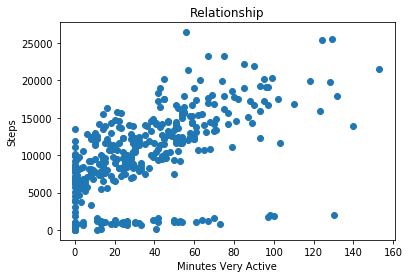

In [48]:

plt.scatter(fitbit['Minutes Very Active'],fitbit['Steps'])
plt.title('Relationship')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
They are not corelated
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [51]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

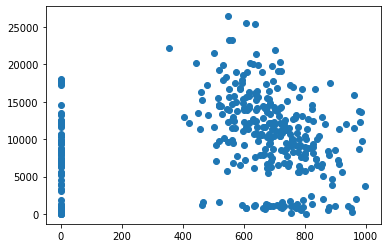

In [52]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'],fitbit['Steps'])

In [ ]:
"""
No they are not related to each other.
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [53]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

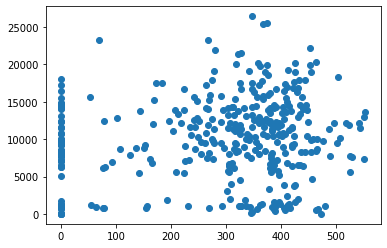

In [54]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'],fitbit['Steps'])

In [ ]:
"""
No they are strongly correlated to each other
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [49]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [55]:
# your code here
cor_fit=fitbit.loc[:,['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit

Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [56]:
# your code here
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [21]:
# your code here
time_grades=pd.read_csv('Time_Grades.csv')

#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264F6EEEC08>,
      dtype=object)

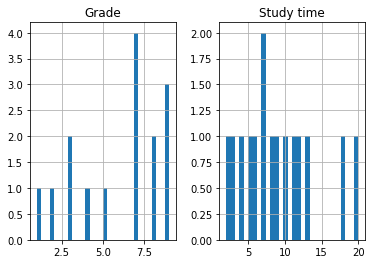

In [23]:
# your code here
time_grades.hist(bins=30)

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [24]:
# your code here
# Pearson 
time_grades['Study time'].corr(time_grades['Grade'])

0.7980456073578858

In [25]:
#Spearman
time_grades['Study time'].corr(time_grades['Grade'],method='spearman')

0.819658753036942

In [ ]:
"""
Both of them show a positive correlation showing the indication that they are related to each other
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

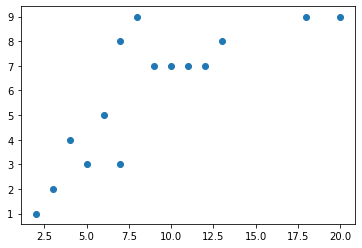

In [26]:
# your code here
plt.scatter(time_grades['Study time'],time_grades['Grade'])

In [ ]:
"""
We have a strong correlation between time of study and grade. As time of study increases the Grade also increases.
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
Spearman correlation is a special case of Pearson.
The Spearman correlation coefficient is based on the ranked values for each variable
Correlation coefficients measure linear (Pearson) or monotonic (Spearman) relationships.

"""